# Explore Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
sns.set()

In [6]:
main_df = pd.read_csv('data.csv')
main_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [7]:
display(main_df.describe())
display(main_df.info())

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


None

In [8]:
main_df.department.value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

In [9]:
#тут текучість кадрів

# Cleaning

In [10]:
main_df.filed_complaint.fillna(0, inplace=True)
main_df.recently_promoted.fillna(0, inplace=True)
main_df.status.replace('Employed', 0, inplace=True)
main_df.status.replace('Left', 1, inplace=True)



In [11]:
display(main_df.salary.unique())
display(main_df.salary.value_counts())

array(['low', 'medium', 'high'], dtype=object)

low       6952
medium    6146
high      1151
Name: salary, dtype: int64

In [12]:
main_df.salary = main_df.salary.astype('category')
main_df.salary = main_df.salary.cat.reorder_categories(['low', 'medium', 'high'])
main_df.salary = main_df.salary.cat.codes

In [13]:
display(main_df.salary.value_counts())

0    6952
1    6146
2    1151
Name: salary, dtype: int64

In [14]:
main_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,0,0.829896,1,5.0
1,232,support,0.0,NaN,3,0.0,0,0.834544,0,2.0
2,184,sales,0.0,0.788830,3,0.0,1,0.834988,0,3.0
3,206,sales,0.0,0.575688,4,0.0,0,0.424764,0,2.0
4,249,sales,0.0,0.845217,3,0.0,0,0.779043,0,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,0.0,0.735865,5,0.0,0,0.263282,0,5.0
14245,257,sales,0.0,0.638604,3,0.0,0,0.868209,0,2.0
14246,232,finance,1.0,0.847623,5,0.0,1,0.898917,1,5.0
14247,130,IT,0.0,0.757184,4,0.0,1,0.641304,0,3.0


In [15]:
nan_tenure = main_df[main_df['tenure'].isnull() & main_df['last_evaluation'].isnull() & main_df['satisfaction'].isnull()]
nan_tenure

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
24,125,temp,0.0,NaN,2,0.0,1,NaN,0,NaN
28,67,temp,0.0,NaN,1,0.0,0,NaN,0,NaN
44,70,temp,0.0,NaN,3,0.0,0,NaN,0,NaN
252,81,temp,0.0,NaN,1,0.0,0,NaN,0,NaN
291,71,temp,0.0,NaN,2,0.0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...
13850,95,temp,0.0,NaN,2,0.0,0,NaN,0,NaN
14083,123,temp,0.0,NaN,1,0.0,1,NaN,0,NaN
14105,81,temp,1.0,NaN,1,0.0,1,NaN,0,NaN
14126,132,temp,0.0,NaN,2,0.0,1,NaN,1,NaN


In [16]:
main_df = main_df[main_df['department'] != 'temp']
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14068 non-null  int64  
 1   department         13359 non-null  object 
 2   filed_complaint    14068 non-null  float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14068 non-null  int64  
 5   recently_promoted  14068 non-null  float64
 6   salary             14068 non-null  int8   
 7   satisfaction       14068 non-null  float64
 8   status             14068 non-null  int64  
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(3), int8(1), object(1)
memory usage: 1.1+ MB


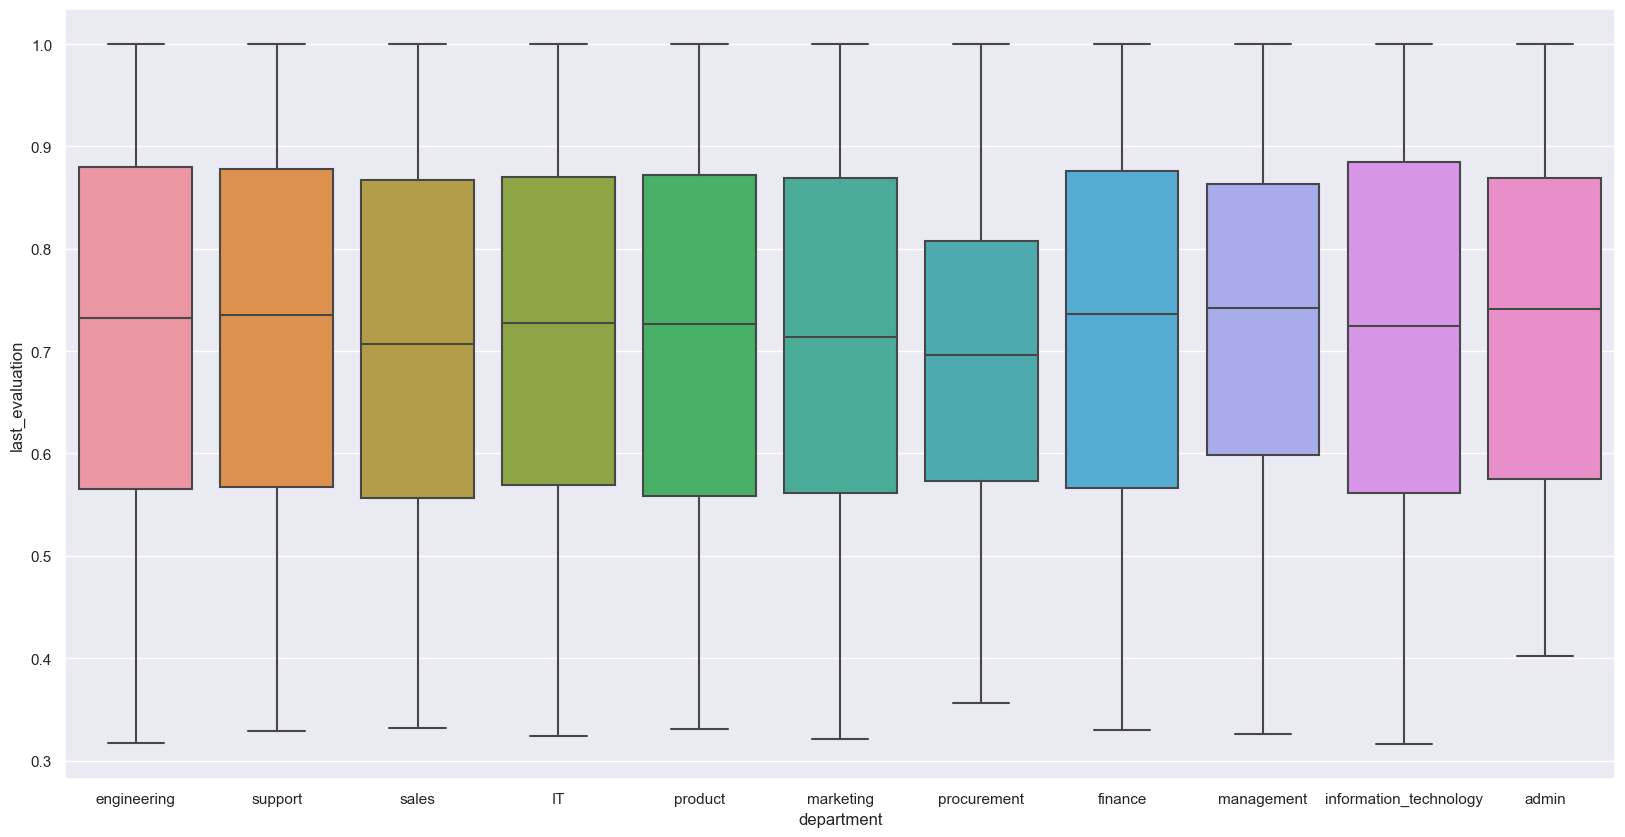

In [17]:
_ = plt.figure(figsize=(20, 10))
_ = sns.boxplot(x='department', y='last_evaluation', data=main_df)
_ = plt.ylabel('last_evaluation')
_ = plt.xlabel('department')
plt.show()

In [18]:
pivot_df = main_df.pivot_table(values=['last_evaluation', 'satisfaction', 'avg_monthly_hrs', 'tenure'], index='department', aggfunc=[np.mean, np.median]) 
pivot_df

mean                                         \
                       avg_monthly_hrs last_evaluation satisfaction    tenure   
department                                                                      
IT                          202.175711        0.720712     0.628324  3.481481   
admin                       201.272727        0.726282     0.611450  3.369318   
engineering                 202.469522        0.722332     0.617907  3.402392   
finance                     201.175824        0.723880     0.586787  3.543956   
information_technology      202.167464        0.716156     0.626717  3.315789   
management                  201.025210        0.729714     0.630428  4.294118   
marketing                   199.664225        0.715018     0.629122  3.567766   
procurement                 199.482759        0.699205     0.627930  3.264368   
product                     199.991860        0.719616     0.628774  3.487209   
sales                       200.842467        0.711254     0.623075  3.527148   
support                     200.975495        0.723200     0.626923  3.394910   

                                median                                      
                       avg_monthly_hrs last_evaluation satisfaction tenure  
department                                                                  
IT                               198.0        0.727363     0.666779    3.0  
admin                            196.0        0.740803     0.645048    3.0  
engineering                      201.0        0.732394     0.650585    3.0  
finance                          198.5        0.735929     0.611879    3.0  
information_technology           207.0        0.724781     0.630377    3.0  
management                       204.0        0.742450     0.654405    3.0  
marketing                        198.0        0.713747     0.652517    3.0  
procurement                      194.5        0.696037     0.670033    3.0  
product                          198.0        0.726919     0.657535    3.0  
sales                            201.0        0.706577     0.653309    3.0  
support                          201.0        0.735612     0.666912    3.0

In [19]:
nan_department = main_df[main_df['department'].isnull()]
nan_department

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
39,184,NaN,0.0,1.000000,5,0.0,0,0.297124,0,5.0
64,159,NaN,0.0,0.694101,3,0.0,0,0.556402,0,3.0
87,113,NaN,0.0,0.511794,4,0.0,0,0.632133,0,3.0
100,241,NaN,0.0,0.766545,3,0.0,0,0.851892,0,3.0
105,161,NaN,0.0,0.695098,2,0.0,1,0.611689,0,5.0
...,...,...,...,...,...,...,...,...,...,...
14166,263,NaN,0.0,0.937390,5,0.0,1,0.820062,1,5.0
14169,310,NaN,0.0,0.793898,7,0.0,0,0.111329,1,4.0
14200,191,NaN,1.0,0.484292,3,0.0,0,0.528702,0,2.0
14218,280,NaN,0.0,0.565752,3,0.0,1,0.493396,0,2.0


In [20]:
main_df = main_df.reset_index(drop=True)
main_df.department.fillna('Anonymous', inplace=True)
main_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,0,0.829896,1,5.0
1,232,support,0.0,NaN,3,0.0,0,0.834544,0,2.0
2,184,sales,0.0,0.788830,3,0.0,1,0.834988,0,3.0
3,206,sales,0.0,0.575688,4,0.0,0,0.424764,0,2.0
4,249,sales,0.0,0.845217,3,0.0,0,0.779043,0,3.0
...,...,...,...,...,...,...,...,...,...,...
14063,178,IT,0.0,0.735865,5,0.0,0,0.263282,0,5.0
14064,257,sales,0.0,0.638604,3,0.0,0,0.868209,0,2.0
14065,232,finance,1.0,0.847623,5,0.0,1,0.898917,1,5.0
14066,130,IT,0.0,0.757184,4,0.0,1,0.641304,0,3.0


In [21]:
display(main_df.info())
display(main_df.describe())
display(main_df.status.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14068 entries, 0 to 14067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14068 non-null  int64  
 1   department         14068 non-null  object 
 2   filed_complaint    14068 non-null  float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14068 non-null  int64  
 5   recently_promoted  14068 non-null  float64
 6   salary             14068 non-null  int8   
 7   satisfaction       14068 non-null  float64
 8   status             14068 non-null  int64  
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(3), int8(1), object(1)
memory usage: 1003.0+ KB


None

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,14068.000000,14068.000000,12717.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,0.143944,0.718477,3.801038,0.021325,0.592764,0.621295,0.239338,3.497228
std,49.959962,0.351045,0.173062,1.236058,0.144470,0.635435,0.250469,0.426694,1.460917
min,96.000000,0.000000,0.316175,2.000000,0.000000,0.000000,0.040058,0.000000,2.000000
25%,156.000000,0.000000,0.563866,3.000000,0.000000,0.000000,0.450390,0.000000,3.000000
50%,200.000000,0.000000,0.724939,4.000000,0.000000,1.000000,0.652527,0.000000,3.000000
75%,245.000000,0.000000,0.871358,5.000000,0.000000,1.000000,0.824951,0.000000,4.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,1.000000,10.000000


0    10701
1     3367
Name: status, dtype: int64

In [22]:
main_dummy = pd.get_dummies(main_df, drop_first=True)

In [23]:
main_dummy

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,department_IT,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,department_product,department_sales,department_support
0,221,0.0,0.932868,4,0.0,0,0.829896,1,5.0,0,0,1,0,0,0,0,0,0,0,0
1,232,0.0,NaN,3,0.0,0,0.834544,0,2.0,0,0,0,0,0,0,0,0,0,0,1
2,184,0.0,0.788830,3,0.0,1,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,1,0
3,206,0.0,0.575688,4,0.0,0,0.424764,0,2.0,0,0,0,0,0,0,0,0,0,1,0
4,249,0.0,0.845217,3,0.0,0,0.779043,0,3.0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14063,178,0.0,0.735865,5,0.0,0,0.263282,0,5.0,1,0,0,0,0,0,0,0,0,0,0
14064,257,0.0,0.638604,3,0.0,0,0.868209,0,2.0,0,0,0,0,0,0,0,0,0,1,0
14065,232,1.0,0.847623,5,0.0,1,0.898917,1,5.0,0,0,0,1,0,0,0,0,0,0,0
14066,130,0.0,0.757184,4,0.0,1,0.641304,0,3.0,1,0,0,0,0,0,0,0,0,0,0


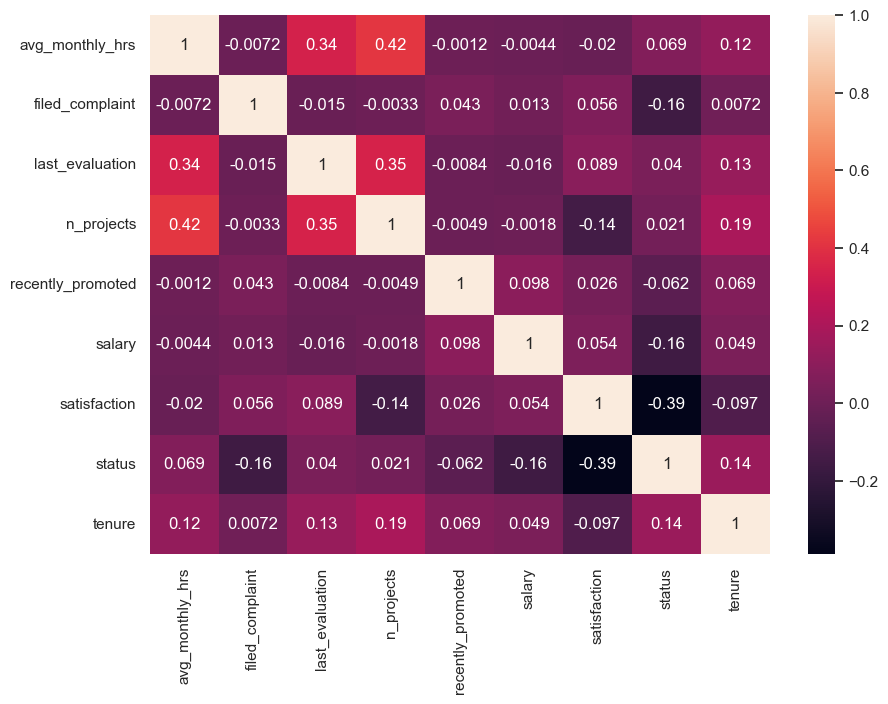

In [24]:
del_departm = main_df.drop('department', axis=1)
corr_matrix = del_departm.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

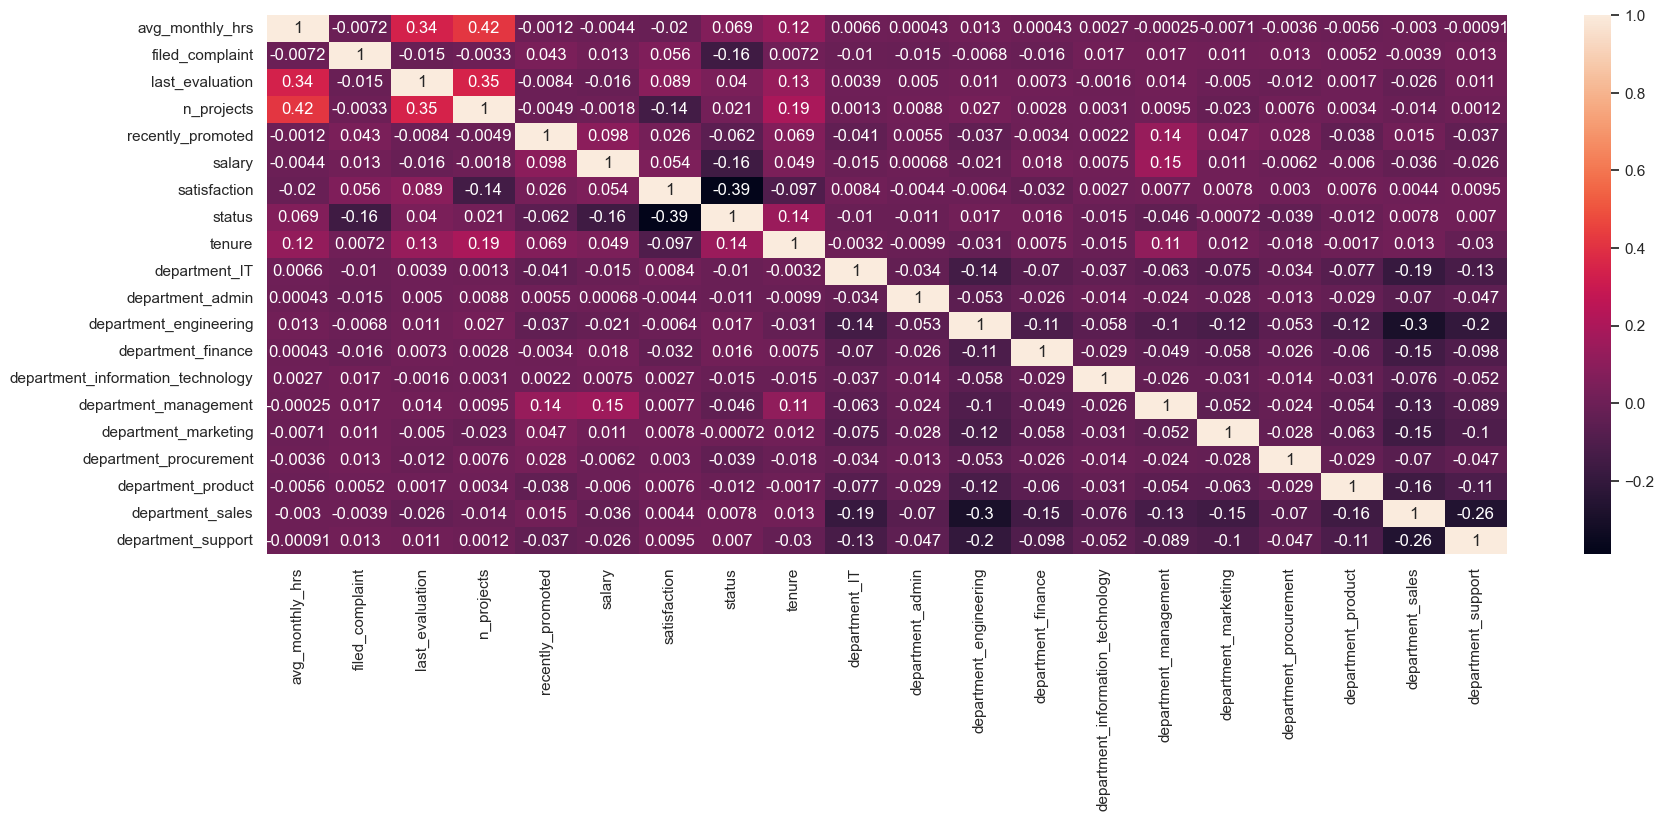

In [25]:
corr_matrix = main_dummy.corr()
plt.figure(figsize=(20, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
evaluation_df = main_df.dropna(subset='last_evaluation')
evaluation_dummy = pd.get_dummies(evaluation_df, drop_first=True)



In [27]:
ev_nan = main_df[main_df['last_evaluation'].isnull()]
ev_data = ev_nan.drop("last_evaluation", axis=1)
ev_dum_pred = pd.get_dummies(ev_data, drop_first=True)


In [28]:
X_ev = evaluation_dummy.drop("last_evaluation", axis=1)
y_ev = evaluation_dummy.last_evaluation

In [29]:
X_ev_train, X_ev_test, y_ev_train, y_ev_test = train_test_split(X_ev, y_ev, test_size= 0.3, random_state=42)

In [30]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

param_grid = [
    {
        'model': [LinearRegression(normalize=False)],
        'model__normalize': [True, False]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]



In [31]:
# Пошук найкращих параметрів
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_ev_train, y_ev_train)

# Перевірка кращої моделі на тестових даних
best_model = grid.best_estimator_
best_model.fit(X_ev_train, y_ev_train)


D:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.001))])

In [32]:
print(best_model)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.001))])


In [33]:
y_ev_pred = best_model.predict(X_ev_test)

print(f"R^2: {r2_score(y_ev_test, y_ev_pred)}")
print(f"MSE: {mean_squared_error(y_ev_test, y_ev_pred)}")
print(f"MAE: {mean_absolute_error(y_ev_test, y_ev_pred)}")

R^2: 0.19282063293874485
MSE: 0.024080622029989576
MAE: 0.12854418597612732


In [34]:
evaluation_predict = best_model.predict(ev_dum_pred)

In [35]:
evaluation_predict

array([0.7280963 , 0.5860524 , 0.61017544, ..., 0.62173435, 0.7239678 ,
       0.68421971])

In [36]:
rest_df = main_df[~main_df['last_evaluation'].isnull()]
ev_nan.loc[:, 'last_evaluation'] = evaluation_predict
finish_df = pd.concat([rest_df, ev_nan])

C:\Users\IHOR\AppData\Local\Temp\ipykernel_10512\3392877445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_nan.loc[:, 'last_evaluation'] = evaluation_predict


In [37]:
finish_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14068 non-null  int64  
 1   department         14068 non-null  object 
 2   filed_complaint    14068 non-null  float64
 3   last_evaluation    14068 non-null  float64
 4   n_projects         14068 non-null  int64  
 5   recently_promoted  14068 non-null  float64
 6   salary             14068 non-null  int8   
 7   satisfaction       14068 non-null  float64
 8   status             14068 non-null  int64  
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(3), int8(1), object(1)
memory usage: 1.1+ MB


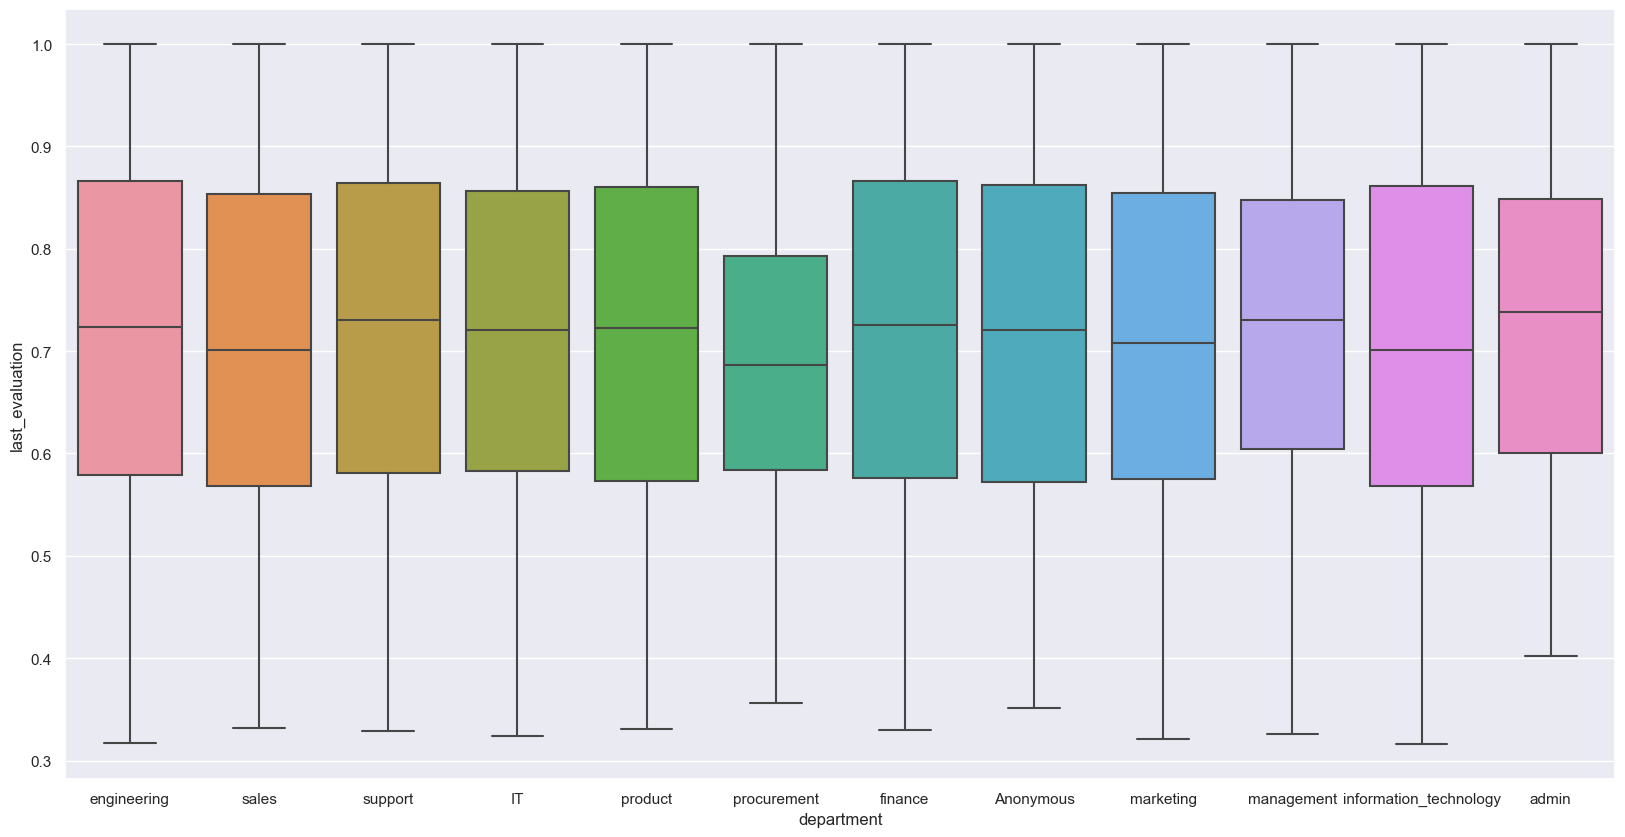

In [38]:
_ = plt.figure(figsize=(20, 10))
_ = sns.boxplot(x='department', y='last_evaluation', data=finish_df)
_ = plt.ylabel('last_evaluation')
_ = plt.xlabel('department')
plt.show()

In [39]:
dummy = pd.get_dummies(finish_df, drop_first=True)

In [40]:
main_df.n_projects.value_counts()

4    4070
3    3796
5    2590
2    2265
6    1104
7     243
Name: n_projects, dtype: int64

0.6913846967818488